In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [74]:
# mpl.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.size'] = 16

# Try granger causality

In [53]:
df = pd.read_csv("aggregated_individual_data/0_aggregated.csv", index_col=0, header=0, parse_dates=["date"])
# df["date"] = df["date"]
df= df.iloc[27:-1]
df['days'] = (df['date'] - df['date'].min()).dt.days.astype(int)
df.drop(["date","weekday", 'appCat.weather'], axis=1,inplace=True)
# df.drop("Unnamed: 0", axis=1, inplace=True)
df

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,days
3,6.40,0.600000,0.500000,0.236880,6142.161000,3.0,1.0,731.429,4962.918,93.324,21.076,0.000,0.000,98.143,439.632,37.305,0.000,117.621,0
4,6.80,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,5237.319,94.346,43.403,0.000,0.000,72.823,900.839,0.000,0.000,30.086,1
5,6.00,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,9270.629,976.971,34.106,0.000,3.010,66.558,3223.626,419.805,0.000,178.732,2
6,6.75,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,10276.751,68.206,43.054,0.000,0.000,178.819,1919.471,0.000,235.223,222.893,3
7,6.60,-0.200000,0.600000,0.101308,16423.801000,0.0,0.0,1167.497,8988.753,910.479,52.331,0.000,0.000,97.498,4592.059,0.000,0.000,33.365,4
8,7.00,0.200000,0.800000,0.159511,17442.149999,2.0,1.0,1229.327,6936.512,639.339,42.219,0.000,182.451,58.532,935.381,47.314,0.000,179.029,5
9,6.40,-0.600000,0.600000,0.095698,4923.489000,5.0,0.0,10062.595,866.833,1005.403,89.166,233.036,0.000,225.951,512.741,1133.009,0.000,301.717,6
10,8.00,0.200000,1.000000,0.068203,8322.622000,4.0,1.0,1952.630,2720.692,1627.429,0.000,0.000,0.000,169.594,472.888,52.435,0.000,600.637,7
11,7.50,-0.500000,0.750000,0.049093,4523.214001,0.0,0.0,414.365,1298.505,1535.677,0.000,0.000,0.000,74.003,167.685,0.000,66.477,38.296,8
12,7.40,0.000000,0.600000,0.070505,11836.834000,6.0,0.0,2961.405,5332.637,1758.920,41.255,51.176,0.000,268.554,1350.655,183.381,29.290,210.305,9


In [55]:
def granger_causality_matrix(data, variables, test="ssr_chi2test", verbose=False, maxlag=7):
    df = pd.DataFrame(np.zeros((len(variables),len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [57]:
# Use your granger_causality_matrix function on the days column
variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities']
granger_matrix = granger_causality_matrix(df[['days'] + variables], variables)
granger_matrix

,mood_x,circumplex.arousal_x,circumplex.valence_x,activity_x,screen_x,call_x,sms_x,appCat.builtin_x,appCat.communication_x,appCat.entertainment_x,appCat.finance_x,appCat.game_x,appCat.office_x,appCat.other_x,appCat.social_x,appCat.travel_x,appCat.unknown_x,appCat.utilities_x
mood_y,1.0000,0.5114,0.0001,0.0143,0.0000,0.3349,0.1633,0.7973,0.0020,0.0944,0.3192,0.0708,0.0000,0.2381,0.3788,0.0965,0.0000,0.0073
circumplex.arousal_y,0.0015,1.0000,0.0197,0.1773,0.3142,0.0208,0.5697,0.0091,0.3269,0.2774,0.3913,0.0941,0.0326,0.0794,0.0021,0.0000,0.1667,0.2276
circumplex.valence_y,0.2388,0.3403,1.0000,0.1583,0.1497,0.2001,0.2129,0.0280,0.0071,0.3194,0.1899,0.0190,0.0000,0.1105,0.0082,0.0009,0.0000,0.0572
activity_y,0.0212,0.0012,0.0052,1.0000,0.0000,0.2639,0.0073,0.1261,0.0001,0.1391,0.5242,0.0767,0.6646,0.0662,0.0000,0.3465,0.0493,0.2953
screen_y,0.1089,0.0104,0.1519,0.1107,1.0000,0.5816,0.0253,0.1677,0.2785,0.0477,0.1155,0.3322,0.1244,0.0350,0.0909,0.3118,0.2513,0.0699
call_y,0.2379,0.1420,0.0000,0.0002,0.0002,1.0000,0.0325,0.0728,0.0000,0.0198,0.3529,0.0848,0.0016,0.1340,0.1544,0.0410,0.0081,0.1262
sms_y,0.0187,0.1696,0.0041,0.1199,0.2285,0.0056,1.0000,0.2729,0.2252,0.0521,0.0922,0.1002,0.2165,0.0320,0.1638,0.2813,0.4891,0.0612
appCat.builtin_y,0.0011,0.0322,0.0000,0.0350,0.0056,0.1189,0.5675,1.0000,0.0352,0.9056,0.0000,0.0876,0.0000,0.0743,0.0016,0.0000,0.0000,0.0831
appCat.communication_y,0.0570,0.0057,0.3634,0.0080,0.1877,0.4459,0.2001,0.1283,1.0000,0.0969,0.1110,0.0000,0.0126,0.2388,0.4331,0.0075,0.1778,0.0588
appCat.entertainment_y,0.0000,0.0040,0.0014,0.0013,0.0199,0.2139,0.1316,0.0731,0.0229,1.0000,0.2461,0.7089,0.7922,0.1506,0.0092,0.4093,0.8377,0.0206


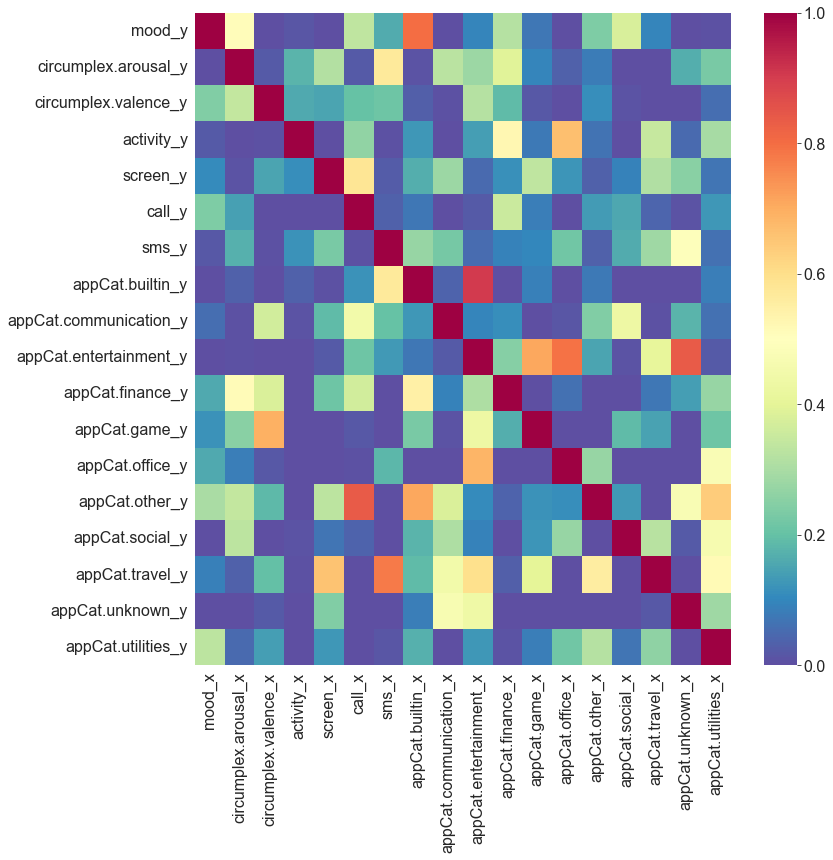

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(granger_matrix, cmap="Spectral_r")
plt.show()